<p style="background-color:mediumorchid;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>Retail Sales Analysis with RNN</b></p>

# <font color='purple'> <b>RNN (Time Series)</b><font color='black'>  

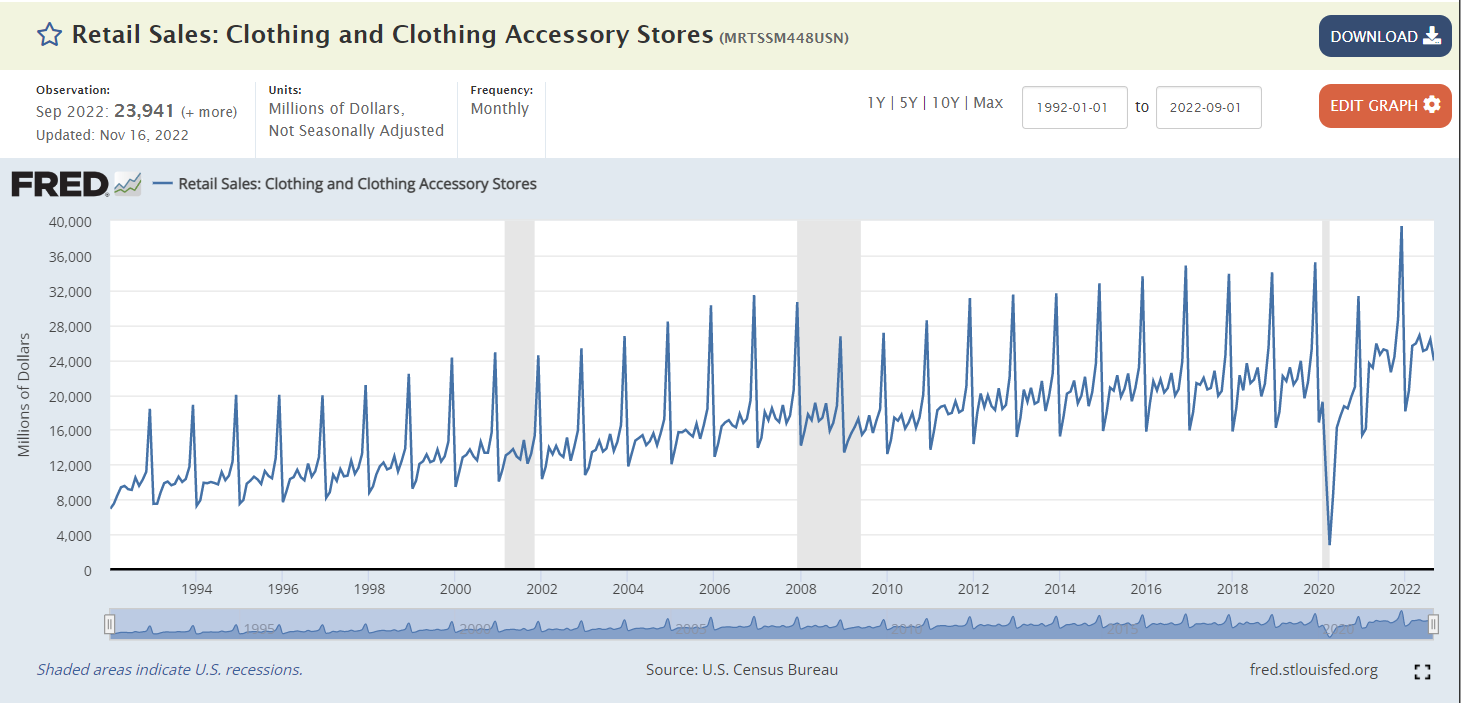

## <font color='mediumorchid'> <b>About Data</b><font color='black'>  

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

This data is related to monthly retail and food services sales in the United States.

"Monthly Retail Trade and Food Services" data refers to monthly figures related to sales in the retail sector and activities in food services. These data are used as an indicator of consumer spending and economic activity.

This data covers sales in the retail sector and food services activities in the United States. Sales are expressed in millions of dollars and are not seasonally adjusted, meaning that seasonal effects have not been removed from the data.

Monthly retail trade and food services data can be found in the Federal Reserve Bank's FRED database and is regularly updated. This data can be used for various purposes such as economic analysis, evaluating trends, and tracking consumer spending.

# <font color='purple'> <b>Importing Libraries</b><font color='black'>  

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# <font color='purple'> <b>Loading The Dataset</b><font color='black'>  

In [31]:
df = pd.read_csv('MRTSSM448USN.csv',
                 index_col='observation_date',
                 parse_dates=True
                )

In [32]:
df.head(15)

,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
1992-06-01,9182
1992-07-01,9103
1992-08-01,10513
1992-09-01,9573


In [33]:
df.tail()

,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 396 entries, 1992-01-01 to 2024-12-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MRTSSM448USN  396 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB


In [35]:
df.columns = ['Sales']

In [36]:
df.head()

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


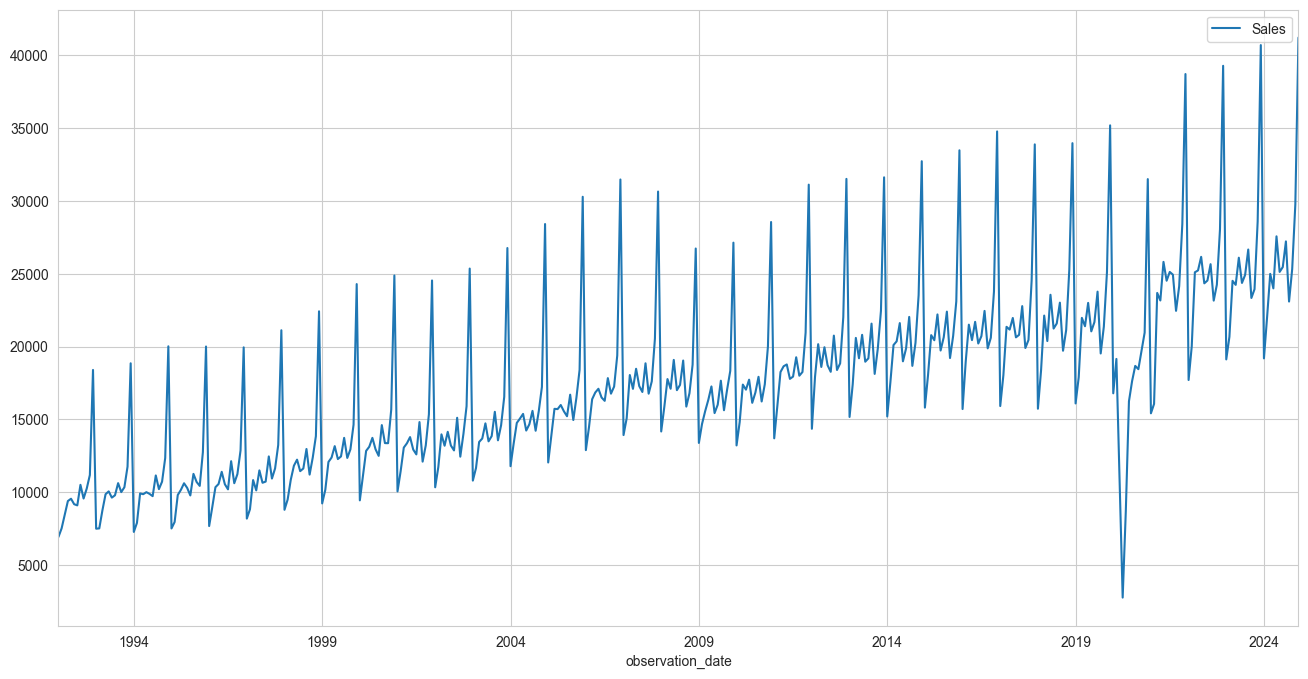

In [37]:
df.plot(figsize=(16,8));

# <font color='purple'> <b>Preprocessing of Data</b><font color='black'>  

## <font color='mediumorchid'> <b>Train | Test Split</b><font color='black'>  

In [40]:
len(df)

396

In [41]:
test_size = 24

In [42]:
test_index = len(df)- test_size
test_index

372

In [43]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [44]:
len(train)

372

In [45]:
len(test)

24

In [46]:
train

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2022-08-01,25651
2022-09-01,23152
2022-10-01,24243


In [47]:
test

,Sales
observation_date,
2023-01-01,19118
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232
2023-05-01,26096
2023-06-01,24364
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332


## <font color='mediumorchid'> <b>Scaling</b><font color='black'>  

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

This code snippet is part of the data preprocessing step. The `scaler` object, which is a scaling object, is used to scale the training and test data.

The `fit_transform()` method applies the scaler object to the training data, scaling and transforming it. While scaling the training data, the scaler object analyzes the data to fit itself and scales the data using statistical information.

Then, the `transform()` method is used to apply the same scaler object to the test data. In this case, the scaler uses the scaling factors it learned from the training data to scale the test data. This ensures that both the training and test data are transformed according to the same scaling factors.

This process ensures that the data is scaled to the same range. Scaling can help the model perform better and produce more stable results.

## <font color='mediumorchid'> <b>Time Series Generator</b><font color='black'>  

The TimeSeriesGenerator is a tool that facilitates the processing of time series data for Recurrent Neural Network (RNN) models.

RNN models are used to predict the future based on past time steps. The TimeSeriesGenerator matches the dataset with examples of a predefined length by performing time series windowing. Based on this windowing, input and target data are generated.

In the code above, a generator is created for the training data using the TimeSeriesGenerator. The train_scaled dataset is used as both the input (X) and target (y) data. The `length` parameter specifies the length of each time series example. That is, each example contains `length` past time steps and is used to predict the next time step.

The `batch_size` specifies how many examples will be grouped together in batches. This ensures that the model works more efficiently during training.

The TimeSeriesGenerator automatically splits the data into examples during the training process, and in each training step, an example is grouped together. This allows the RNN model to work more effectively on time series data and make predictions based on the past.

In [55]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

The TimeseriesGenerator class is a utility class that allows time series data to be used in batches for training and validation. This class takes time series parameters along with a series of data points that are equally spaced, and it generates batch data for training/validation.

The constructor of the class takes in the data, targets, output sequence length, sampling rate, step size, start and end indices, shuffle option, reverse order option, and batch size. With these parameters, batch data examples are generated from the time series data and targets.

In [57]:
length = 12    # Take 12 rows and guess the 13th.
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)   # shuffle= false

The reason for using train_scaled twice as the first argument of the TimeseriesGenerator in the given code snippet is that this generator needs to match input and target data. When working with time series data, the generator must maintain the relationship between the input and target data while creating a sample sequence.

Here’s the logic of this code snippet:

- The first `train_scaled` argument represents the input data used by the generator. This data sequence takes a specific window of the time series data (for the specified `length`), and this window is used to predict the next time step.

- The second `train_scaled` argument represents the target data used by the generator. This corresponds to the value of the next time step following the window selected in the first step. In other words, the input window is used to predict the next value.

Therefore, having these two arguments the same ensures that the relationship between the input and target data is maintained. This way, during model training, the correct input-target relationship is preserved while learning from the time series data.

---

Batch size specifies how many examples will be processed at once. When `batch_size = 1`, each data example is processed individually. That is, each data point is considered as a separate example, and the next data point is predicted based solely on this single example.

In this case, since each time series example is processed individually, the model is updated during each iteration, and the weight updates are made based on a single example. When batch size is set to 1, the model is trained and makes predictions with just one example at each step.

The batch size can be adjusted to balance memory usage and computation time. Larger batch sizes can provide faster computation times, but use more memory, while smaller batch sizes may use less memory but require longer computation times.

In this example, since `batch_size = 1` is set, each data point is processed individually, and the next data point is predicted based only on this single example. This allows the impact of each example on the previous data points to be tracked, leading to more accurate predictions.

---

In this case, `train_scaled` is used twice because TimeSeriesGenerator is provided with the same `train_scaled` dataset for both input data (X) and target data (y).

The TimeSeriesGenerator is used to create an input sequence (X) and corresponding target values (y) from a series of data points. Here, since `train_scaled` is used as both the input and target data, it is specified twice. This way, TimeSeriesGenerator will be trained using the input data to predict future target values, allowing the model to learn.

In [59]:
# 367-12 = 355 (since batch size = 1 and stride = 1)

In [60]:
len(generator)

360

In [61]:
generator[0]

(array([[[0.11406802],
         [0.13012854],
         [0.15619262],
         [0.18157152],
         [0.18587442],
         [0.17556938],
         [0.17340423],
         [0.21204813],
         [0.18628553],
         [0.20494971],
         [0.23052046],
         [0.42807027]]]),
 array([[0.12952558]]))

In [62]:
X, y = generator[0]

In [63]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
Predict this y: 
 [[0.12952558]]


TimeSeriesGenerator creates data samples in a suitable format for RNN models and enables predictions. RNN models perform the learning process and make predictions using these examples.

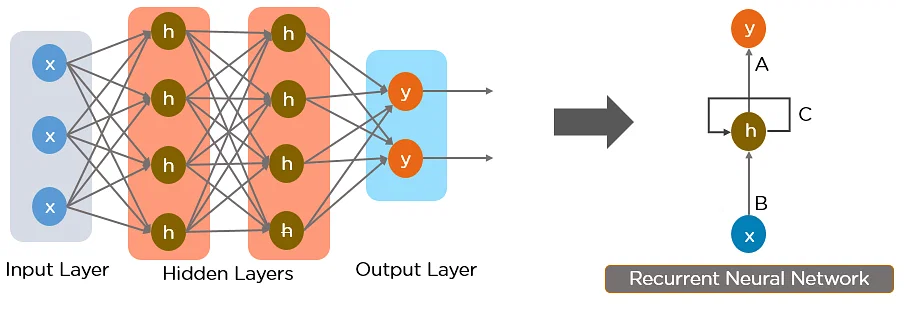

# <font color='purple'> <b>Modeling</b><font color='black'>  

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [68]:
train_scaled.shape

(372, 1)

In [69]:
n_features = train_scaled.shape[1]
n_features

1

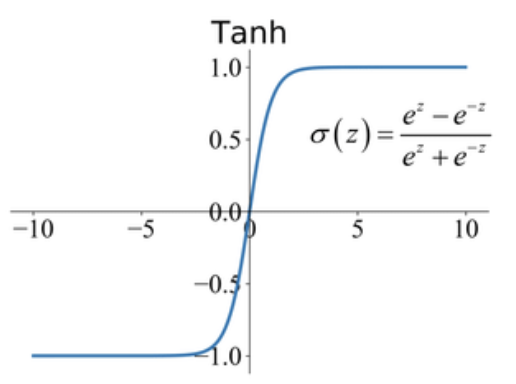

In [71]:
from keras.layers import Dropout

model = Sequential()
model.add(SimpleRNN(units=128, activation="tanh", input_shape=(length, n_features)))
model.add(Dropout(0.2))  # Dropout layer added, dropout rate set to 0.2
model.add(Dense(64, activation="relu"))  # "relu" activation function used
model.add(Dense(32, activation="tanh"))  # "tanh" activation function used
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [72]:
# return_sequences: We use this so that it doesn't forget the sequences when two Rnn come back to back.

In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,009 (105.50 KB)

 Trainable params: 27,009 (105.50 KB)

 Non-trainable params: 0 (0.00 B)

## <font color='mediumorchid'> <b>EarlyStopping and Validation Generator</b><font color='black'>  

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 15)

In [77]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [78]:
len(validation_generator)

12

In [79]:
model.fit(generator,
                    epochs = 30,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0190 - val_loss: 0.0079
Epoch 2/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063 - val_loss: 0.0232
Epoch 3/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - val_loss: 0.0039
Epoch 4/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0058 - val_loss: 0.0096
Epoch 5/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0072 - val_loss: 0.0096
Epoch 6/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0074
Epoch 7/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0078 - val_loss: 0.0041
Epoch 8/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055 - val_loss: 0.0147
Epoch 9/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080 - val_loss: 0.0064
Epoch 10/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0092 - val_loss: 0.0085
Epoch 11/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - val_loss: 0.0015
Epoch 12/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

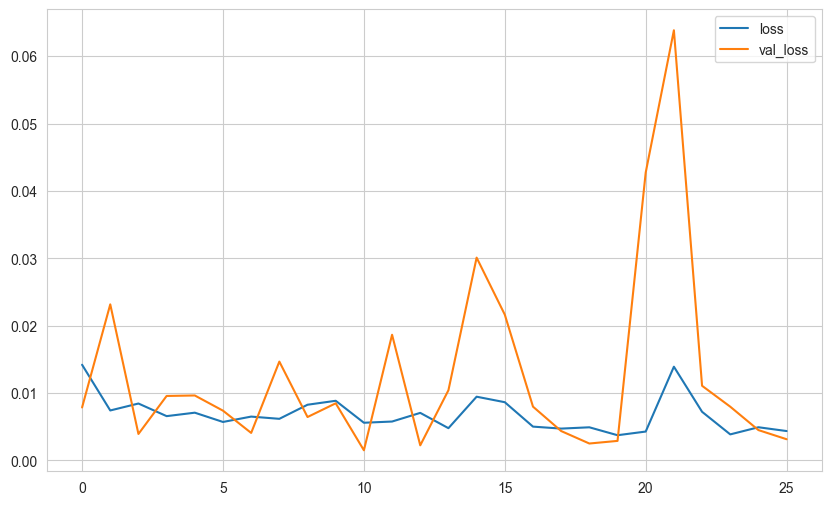

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# <font color='purple'> <b>Evaluate on Test Data</b><font color='black'>  

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    return print("\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [84]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [85]:
current_pred

array([[0.9123175]], dtype=float32)

In [86]:
current_batch

array([[[0.53517848],
        [0.58764428],
        [0.61802763],
        [0.59791756],
        [0.64618576],
        [0.59871447],
        [0.58929813],
        [0.69217491],
        [0.62371832],
        [0.57146144],
        [0.69678855],
        [0.91231751]]])

In [87]:
predictions_scaled

[array([0.5351785], dtype=float32),
 array([0.5876443], dtype=float32),
 array([0.6180276], dtype=float32),
 array([0.59791756], dtype=float32),
 array([0.64618576], dtype=float32),
 array([0.5987145], dtype=float32),
 array([0.5892981], dtype=float32),
 array([0.6921749], dtype=float32),
 array([0.6237183], dtype=float32),
 array([0.57146144], dtype=float32),
 array([0.69678855], dtype=float32),
 array([0.9123175], dtype=float32)]

In [88]:
eval_metrics(test_scaled[:length], predictions_scaled)


mae: 0.040980828043779866 
mse: 0.003280446808056864 
rmse: 0.05727518492381202


# <font color='purple'> <b>Retrain and Forecasting - Create Final Model with full Data</b><font color='black'>  

The "Create Final model with full data" step is used to create a final RNN model trained on the entire dataset. In this step, the previously trained model's weights are preserved, and the model is retrained using the full dataset.

This process is generally performed when the model needs to be adapted to a more general dataset or when more data becomes available. In the initial training phase, a specific subset of data may have been used, but if the model's performance is expected to improve with more data, this step is carried out.

Thus, the "Create Final model with full data" step is used to adapt the model to a larger dataset and enhance its performance.

In [91]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [92]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [93]:
len(df)

396

In [94]:
len(generator)

384

In [95]:
model = Sequential()

model.add(SimpleRNN(units=128, activation="tanh", input_shape=(length, n_features)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.fit(generator, epochs=25)

Epoch 1/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0311
Epoch 2/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0111
Epoch 3/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0072
Epoch 4/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080
Epoch 5/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0058
Epoch 6/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141
Epoch 7/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093
Epoch 8/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0128
Epoch 9/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070
Epoch 10/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0105
Epoch 11/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0123
Epoch 12/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0109
Epoch 13/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046
Epoch 14/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093
Epoch 15/25
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [96]:
scaled_full_data.shape

(396, 1)

In [97]:
scaled_full_data[-length:].shape

(12, 1)

In [98]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


This code example demonstrates the process of making predictions using an LSTM-based model on a time series dataset. Below, I will explain what the code does step by step:

1. `forecast = []`: An empty list is created to store the predictions.

2. `first_eval_batch = scaled_full_data[-length:]`: The data group to be used for the first prediction is selected by slicing the last 'length' values from the dataset.

3. `current_batch = first_eval_batch.reshape((1, length, n_features))`: The data group to be used for the first prediction is reshaped to fit the model. The LSTM model expects input in the shape (samples, timesteps, features), so the data is transformed into a 3D array.

4. `for i in range(length)`: A loop is initiated to make predictions. This loop will run 'length' times, meaning predictions will be made for a specific number of future time steps.

5. `current_pred = model.predict(current_batch)`: The LSTM model calculates the prediction for the next time step based on the current data batch (`current_batch`).

6. `forecast.append(current_pred[0])`: The prediction is added to the `forecast` list. The predictions are stored in a list according to the model's output format.

7. `current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)`: The data batch is updated. This creates the data that will be used for the next prediction. The first time step of the current batch is removed, and the new prediction is added as the last time step.

This loop runs for 'length' iterations, and with each iteration, a prediction is made for the next time step. As a result, the `forecast` list contains the model's predictions for a specific length of the time series. These predictions can then be used or analyzed.

In [100]:
forecast = scaler.inverse_transform(forecast)

In [101]:
forecast

array([[23895.77687079],
       [24241.86064643],
       [26116.31400108],
       [25152.38628215],
       [26579.69750226],
       [25444.96358442],
       [25637.32199854],
       [26129.80425245],
       [23927.90946209],
       [24639.97638464],
       [26533.5374853 ],
       [31038.86822933]])

In [102]:
df

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318


In [85]:
# The date format in the data must be the same.

'D': Daily

'W': Weekly

'M': Monthly (end of the month)

'MS': Monthly (start of the month)

'Q': Quarterly

'A': Yearly (end of the year)

'AS': Yearly (start of the year)

In [160]:
forecast_index = pd.date_range(start = '2025-01-01', periods = length, freq = 'MS')

In [162]:
forecast_index

DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [164]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [166]:
forecast_df

,Forecast
2025-01-01,23895.777
2025-02-01,24241.861
2025-03-01,26116.314
2025-04-01,25152.386
2025-05-01,26579.698
2025-06-01,25444.964
2025-07-01,25637.322
2025-08-01,26129.804
2025-09-01,23927.909
2025-10-01,24639.976


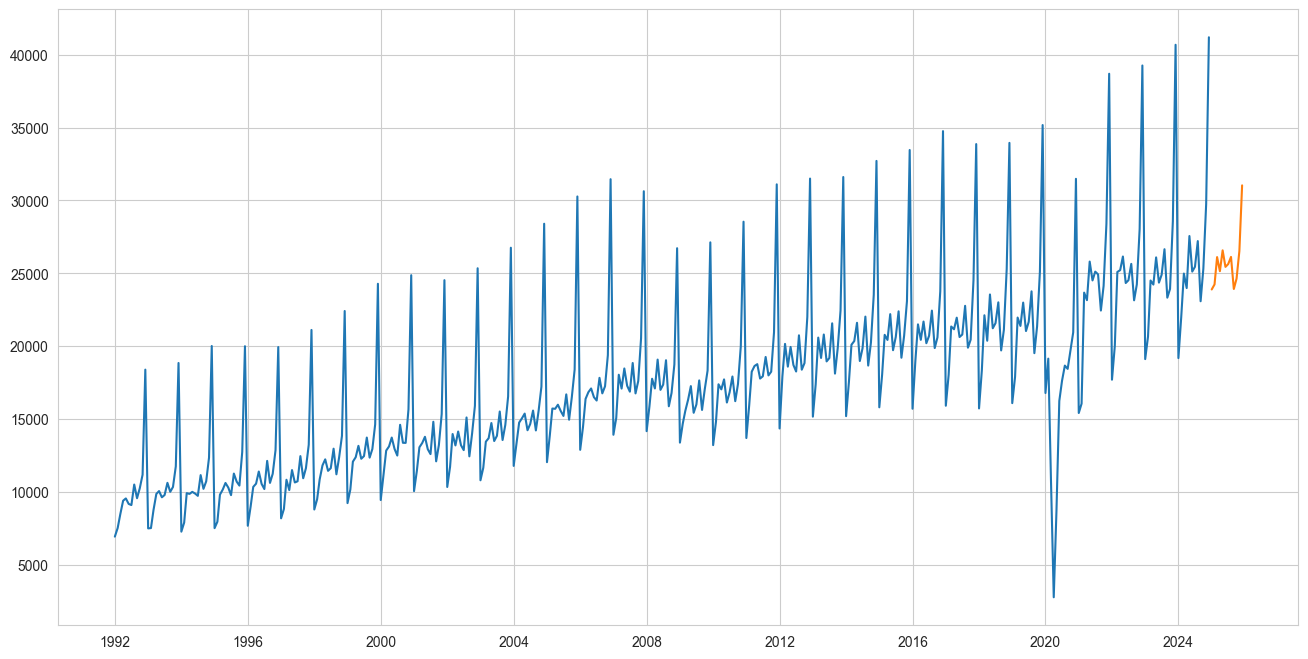

In [168]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast']);

In [172]:
from keras.models import load_model

# Saving model
model.save('final_model.keras')

<p style="background-color:mediumorchid;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>